In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.preprocessing import OneHotEncoder

In [48]:
df_train_orig = pd.read_csv('drive/MyDrive/Sample data/train.csv')
df_macro_orig = pd.read_csv('drive/MyDrive/Sample data/macro.csv')

In [49]:
df_train_orig

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [50]:
df_macro_orig

,timestamp,oil_urals,gdp_quart,gdp_quart_growth,cpi,ppi,gdp_deflator,balance_trade,balance_trade_growth,usdrub,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
0,2010-01-01,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
1,2010-01-02,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
2,2010-01-03,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
3,2010-01-04,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9050,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
4,2010-01-05,76.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.8360,...,690.0,6221.0,527.0,0.41,993.0,NaN,NaN,63.03,22825.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,2016-10-15,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2480,2016-10-16,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9573,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2481,2016-10-17,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,63.0856,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2482,2016-10-18,44.3677,19979.4,-0.6,531.0,601.9,133.16,5.823,2.6,62.9512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Работа с первым датасетом**

In [51]:
df_train = df_train_orig.copy() #Тк планируется изменение  в файле, делаем копию

In [52]:
df_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 292 columns):
 #    Column                                 Dtype  
---   ------                                 -----  
 0    id                                     int64  
 1    timestamp                              object 
 2    full_sq                                int64  
 3    life_sq                                float64
 4    floor                                  float64
 5    max_floor                              float64
 6    material                               float64
 7    build_year                             float64
 8    num_room                               float64
 9    kitch_sq                               float64
 10   state                                  float64
 11   product_type                           object 
 12   sub_area                               object 
 13   area_m                                 float64
 14   raion_popul                         

Можно заметить, что тип некоторых признаков object, что не очень хорошо, тк перед нами стоит задача регрессии и будет удобнее работать с числовыми данными

In [53]:
col = df_train.columns
for el in col:
  if df_train[el].dtype == object:
    print(el)

timestamp
product_type
sub_area
culture_objects_top_25
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
water_1line
big_road1_1line
railroad_1line
ecology


timestamp
product_type: покупка или инвестиция владельца-арендатора

sub_area: название района

culture_objects_top_25: топ 25 объектов культуры

thermal_power_plant_raion: район ТЭЦ

incineration_raion: мусоросжигательный район

oil_chemistry_raion: нефтехимический район

radiation_raion: радиационный район

railroad_terminal_raion: железнодорожный вокзал района

big_market_raion: большой рыночный район

nuclear_reactor_raion: ядерный реакторный район

detention_facility_raion: следственный изолятор района

water_1line: вода 1 линия

big_road1_1line: большая дорога1 1 линия

railroad_1line: железная дорога 1 линия

ecology: экология

In [54]:
col = df_train.columns
for el in col:
  if df_train[el].dtype == object:
    print(f"{el}: {df_train[el].unique()}")

timestamp: ['2011-08-20' '2011-08-23' '2011-08-27' ... '2015-06-27' '2015-06-29'
 '2015-06-30']
product_type: ['Investment' 'OwnerOccupier']
sub_area: ['Bibirevo' 'Nagatinskij Zaton' "Tekstil'shhiki" 'Mitino' 'Basmannoe'
 'Nizhegorodskoe' "Sokol'niki" 'Koptevo' 'Kuncevo' 'Kosino-Uhtomskoe'
 'Zapadnoe Degunino' 'Presnenskoe' 'Lefortovo' "Mar'ino" "Kuz'minki"
 'Nagornoe' "Gol'janovo" 'Vnukovo' 'Juzhnoe Tushino' 'Severnoe Tushino'
 "Chertanovo Central'noe" 'Fili Davydkovo' 'Otradnoe' 'Novo-Peredelkino'
 'Bogorodskoe' 'Jaroslavskoe' 'Strogino' 'Hovrino' "Moskvorech'e-Saburovo"
 'Staroe Krjukovo' 'Ljublino' 'Caricyno' 'Veshnjaki' 'Danilovskoe'
 'Preobrazhenskoe' "Kon'kovo" 'Brateevo' 'Vostochnoe Izmajlovo'
 'Vyhino-Zhulebino' 'Donskoe' 'Novogireevo' 'Juzhnoe Butovo' 'Sokol'
 'Kurkino' 'Izmajlovo' 'Severnoe Medvedkovo' 'Rostokino'
 'Orehovo-Borisovo Severnoe' 'Ochakovo-Matveevskoe' 'Taganskoe'
 'Dmitrovskoe' 'Orehovo-Borisovo Juzhnoe' 'Teplyj Stan' 'Babushkinskoe'
 'Pokrovskoe Streshnevo' 'O

Признаки где вариантов значения два заменим на 0/1(0 - No, 1 - yes)

In [55]:
col = df_train.columns
for el in col:
  if df_train[el].dtype == object:
    if len(df_train[el].unique()) == 2 and el != 'product_type':
      df_train[el] = df_train[el].replace('no', 0)
      df_train[el] = df_train[el].replace('yes', 1)

Рассмотрим колонку с района москвы, где находится недвижимость, это сильно влияет на стоимоть, поэтому можно объединить признаки в округа москвы, а потом применить onehot_encode(), если применить этот метод к имеющимся данным, то датасет сильно раздуется, что может плохо повлиять на предсказание

In [56]:
def assign_ethnicity(row):
    if row['sub_area'] in ['Arbat', 'Basmannoe', "Zamoskvorech'e",
                           "Krasnosel'skoe", 'Meshhanskoe',
                            'Presnenskoe', 'Taganskoe',
                            'Tverskoe', 'Hamovniki', 'Jakimanka']:
        return 'central'
    elif row['sub_area'] in ['Ajeroport', 'Begovoe', 'Beskudnikovskoe',
                            'Vojkovskoe', 'Vostochnoe Degunino',
                            'Golovinskoe', 'Dmitrovskoe',
                            'Zapadnoe Degunino', "Koptevo", 'Levoberezhnoe',
                            'Molzhaninovskoe', 'Savelovskoe',
                            'Sokol', 'Timirjazevskoe', 'Hovrino',
                            'Horoshevskoe']:
        return 'northern'
    elif row['sub_area'] in ['Alekseevskoe', "Altuf'evskoe", 'Babushkinskoe',
                             'Bibirevo', 'Butyrskoe',
                              'Lianozovo', 'Losinoostrovskoe',
                              'Marfino', "Mar'ina Roshha", 'Ostankinskoe',
                              'Otradnoe', 'Rostokino', 'Sviblovo', 'Severnoe',
                              'Severnoe Medvedkovo',
                                        'Juzhnoe Medvedkovo', 'Jaroslavskoe']:
        return 'northeastern'
    elif row['sub_area'] in ['Bogorodskoe', 'Veshnjaki', 'Vostochnoe',
                            'Vostochnoe Izmajlovo', "Gol'janovo",
                            'Ivanovskoe', 'Izmajlovo', 'Kosino-Uhtomskoe',
                            'Metrogorodok', 'Novogireevo',
                            'Novokosino', 'Perovo', 'Preobrazhenskoe',
                            'Severnoe Izmajlovo', 'Sokolinaja Gora',
                                   "Sokol'niki"]:
        return 'eastern'
    elif row['sub_area'] in ['Vyhino-Zhulebino', 'Kapotnja', "Kuz'minki",
                            "Lefortovo", 'Ljublino', "Mar'ino",
                            'Nekrasovka', "Nizhegorodskoe",
                             'Pechatniki', 'Rjazanskij', "Tekstil'shhiki",
                                        'Juzhnoportovoe']:
         return 'southeastern'
    elif row['sub_area'] in  ['Birjulevo Vostochnoe', 'Birjulevo Zapadnoe',
                             'Brateevo', 'Danilovskoe', 'Donskoe',
                             'Zjablikovo', "Moskvorech'e-Saburovo",
                             'Nagatino-Sadovniki', 'Nagatinskij Zaton',
                             "Nagornoe", 'Orehovo-Borisovo Severnoe',
                              'Orehovo-Borisovo Juzhnoe', 'Caricyno',
                                    'Chertanovo Severnoe',
                              "Chertanovo Central'noe", 'Chertanovo Juzhnoe']:
         return 'southern'
    elif row['sub_area'] in  ['Akademicheskoe', 'Gagarinskoe', 'Zjuzino',
                             "Kon'kovo", 'Kotlovka',
                                        'Lomonosovskoe', 'Obruchevskoe',
                              'Severnoe Butovo', 'Teplyj Stan',
                                        'Cheremushki',
                                        'Juzhnoe Butovo', 'Jasenevo']:
         return 'southwestern'
    elif row['sub_area'] in  ["Vnukovo", 'Dorogomilovo', 'Krylatskoe', 'Kuncevo',
                             'Mozhajskoe', 'Novo-Peredelkino',
                                   'Ochakovo-Matveevskoe', 'Prospekt Vernadskogo',
                              'Ramenki', 'Solncevo',
                                   'Troparevo-Nikulino', 'Filevskij Park',
                             'Fili Davydkovo']:
         return 'western'
    elif row['sub_area'] in  ['Kurkino', 'Mitino', 'Pokrovskoe Streshnevo',
                             'Severnoe Tushino', 'Strogino',
                                        'Horoshevo-Mnevniki', 'Shhukino',
                              'Juzhnoe Tushino']:
         return 'northwestern'
    elif row['sub_area'] in  ['Matushkino', 'Savelki', 'Staroe Krjukovo',
                             'Silino', 'Krjukovo']:
         return 'zelenograd'
    elif row['sub_area'] in  ['Poselenie Voskresenskoe', 'Poselenie Vnukovskoe',
                             'Poselenie Desjonovskoe',
                                          'Poselenie Kokoshkino',
                              'Poselenie Marushkinskoe', 'Poselenie Moskovskij',
                                          'Poselenie Mosrentgen',
                              'Poselenie Rjazanovskoe', 'Poselenie Sosenskoe',
                                          'Poselenie Filimonkovskoe', 'Poselenie Shherbinka']:
         return 'novomoskovskiy'
    else:
         return 'troitskiy'


df_train['sub_area'] = df_train.apply(assign_ethnicity, axis=1)

In [57]:
encoder = OneHotEncoder(handle_unknown='ignore')
encoder_df = pd.DataFrame(encoder.fit_transform(df_train[['sub_area']]). toarray ())

df_train = df_train.join (encoder_df)

In [58]:
df_train.rename(columns = {0:'northeastern', 1:'southern', 2:'southeastern',
                           3:'northwestern', 4:'central', 5: 'eastern', 6: 'northern',
                           7:'western', 8:'zelenograd', 9:'southwestern',
                           10: 'novomoskovskiy', 11: 'troitskiy'}, inplace = True )

Поработаем с колонкой 'ecology', можно заметить что есть колонки со знаением no data, следовательно это считается как пропуск, заполним эти пропуски средним значением по окраске - удовлетворительно('satisfactory')

In [59]:
df_train['ecology'] = df_train['ecology'].replace('no data', 'satisfactory')

In [60]:
encoder_df = pd.DataFrame(encoder.fit_transform(df_train[['ecology']]). toarray ())

df_train = df_train.join (encoder_df)

In [61]:
df_train.rename(columns = {0: 'good', 1: 'excellent', 2: 'poor', 3: 'satisfactory'}, inplace=True)

In [62]:
del df_train['ecology']

# Обработка пропусков

In [63]:
import io
buffer = io.StringIO()
colns = df_train.columns
s = df_train.isnull().sum() / len(df_train) * 100
with open("df_info.txt", "w",
          encoding="utf-8") as f:
    for i in range(len(colns)):
        f.write(f"{colns[i]}:  {str(round(s[i], 2))}%\n")

В файле df_info.txt теперь хранить информация о столбцах, где присутствуют пропуски и их процентное соотношение




1.life_sq:  20.56%
Жилая площадь без учета нежилых помещений, мы предполагаем, что такие пропуски встречаются там, где нежилых помещений нет, следовательно пропуски можно заполнить информацией из столбца full_sq

In [64]:
df_train['life_sq'] = df_train['life_sq'].fillna(df_train['full_sq'])

2.floor: 0, 94% Этаж не указан в неквартирной недвижимости, поэтому заменим их 0

In [65]:
df_train['floor'] = df_train['floor'].fillna(0)

3.Можно заметить, что далее в столбцах max_floor, material, built_year, num_room, kitch_kq, state большой и близций по значению процент пропусков, посмотрим на визуализацию пропусков

<Axes: >

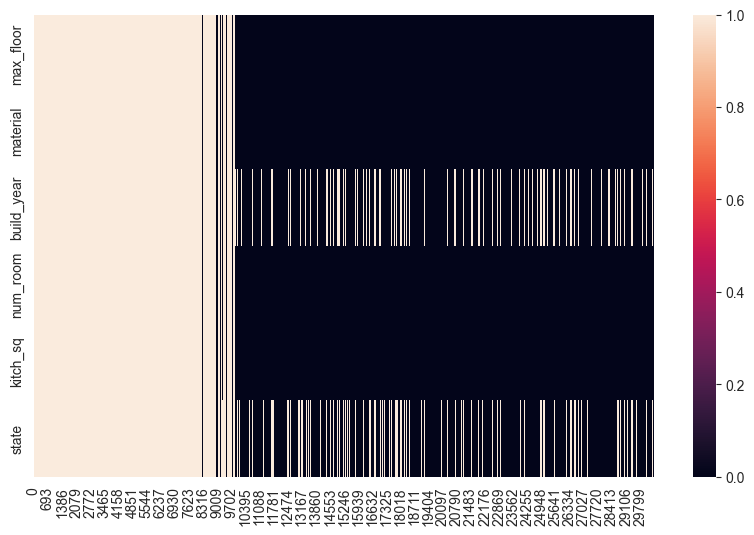

In [66]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train[['max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state']].isna().transpose())

Количество комнат, площадь кухни, материал дома - крайне важные признаки при оуенке картиры, также можно заметить, что эти пропуски в данных встречаются одновременно, поэтому можно удалить строки с пропусками в этих данных и потерять 53% данных


In [67]:
df_train = df_train.dropna(subset=['num_room'])

<Axes: >

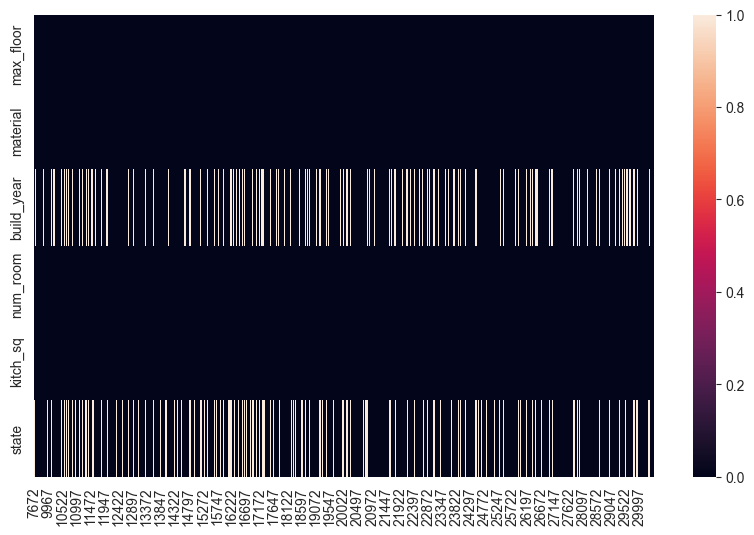

In [68]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train[['max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state']].isna().transpose())

Можно заметить также пропуски в данных по состоянию квартиры и году постройки. Состояние недвижимости крайне важно, как и год постройки, также эти данные сложно заменить дургими значениями, поэтому строки с пропущенными значениями придется удалить

In [69]:
df_train = df_train.dropna(subset=['state'])
df_train = df_train.dropna(subset=['build_year'])

Посмотрим на оставшиеся пропуски

<Axes: >

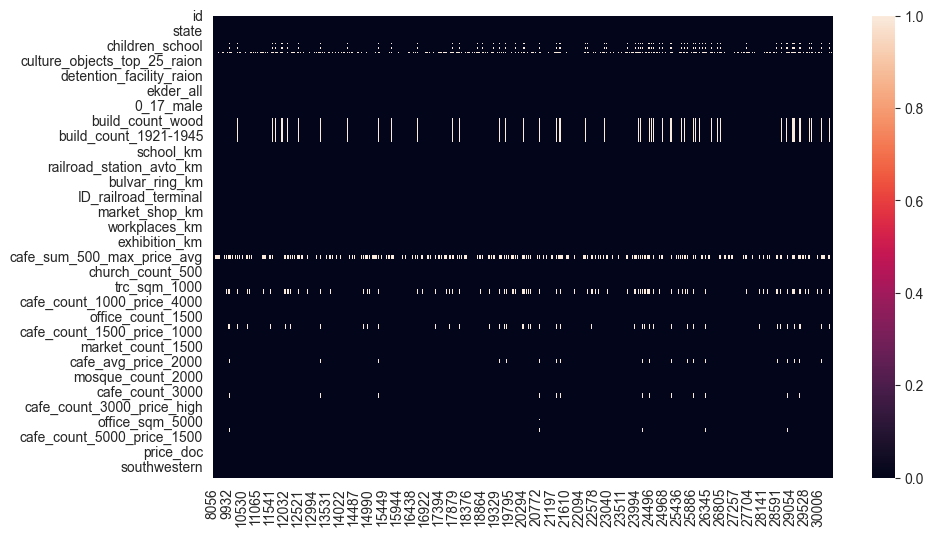

In [70]:
plt.figure(figsize=(10,6))
sns.heatmap(df_train.isna().transpose())

Посмотрим на корреляцию стобцов с пропусками, чтобы понять можем ли мы их удалить или нет

In [71]:
col = df_train.columns.tolist()
s = df_train.isnull().sum ()/ len(df_train) * 100
for i in range(len(col)):
  if s[i] != 0:
    print(f"{col[i]}:  {df_train['price_doc'].corr(df_train[col[i]])}")

preschool_quota:  -0.08368678579200245
school_quota:  -0.01212512727913192
hospital_beds_raion:  0.09038731088865894
raion_build_count_with_material_info:  0.05029616451183128
build_count_block:  -0.008697845061843679
build_count_wood:  -0.042612385427284745
build_count_frame:  -0.025761666904834807
build_count_brick:  0.19900382903731165
build_count_monolith:  0.11616987385488906
build_count_panel:  -0.06645255662070838
build_count_foam:  0.00155294677083487
build_count_slag:  -0.0281051074377337
build_count_mix:  -0.024920882515226
raion_build_count_with_builddate_info:  0.05014460112971288
build_count_before_1920:  0.1441104822956713
build_count_1921-1945:  0.028606007444144443
build_count_1946-1970:  0.039142796549390804
build_count_1971-1995:  -0.055702515171370016
build_count_after_1995:  0.016804475515647187
metro_min_walk:  -0.18243595241280086
metro_km_walk:  -0.18243595240686988
railroad_station_walk_km:  -0.09925074144952664
railroad_station_walk_min:  -0.09925074145218983
I

Удалим столбцы, где корреляция меньше 0,15 по модулю

In [72]:
col = df_train.columns.tolist()
s = df_train.isnull().sum ()/ len(df_train) * 100
for i in range(len(col)):
  if s[i] != 0:
    if abs(df_train['price_doc'].corr(df_train[col[i]])) <= 0.15:
      del df_train[col[i]]

In [73]:
col = df_train.columns.tolist()
s = df_train.isnull().sum ()/ len(df_train) * 100
for i in range(len(col)):
  if s[i] != 0:
    print(f"{col[i]}:  {df_train['price_doc'].corr(df_train[col[i]])}")

build_count_brick:  0.19900382903731165
metro_min_walk:  -0.18243595241280086
metro_km_walk:  -0.18243595240686988


У нас остались пропуски в столбцах с расстоянием до метро и количество керпичей, заполним пропуски при помощи среднего(расстояние до метро в пределах мкад москве среднем одинакого https://alexeygoncharov.livejournal.com/50822.html) и моды(какое количество кирпичей чаще всего используют)

In [74]:
df_train['build_count_brick'] = df_train['build_count_brick'].fillna(df_train['build_count_brick'].median())
df_train['metro_min_walk'] = df_train['metro_min_walk'].fillna(df_train['metro_min_walk'].mean())
df_train['metro_km_walk'] = df_train['metro_km_walk'].fillna(df_train['metro_km_walk'].mean())

## Обработка лишних значений

Коллинеарные признаки
Коллинеарными называются признаки, которые сильно коррелируют друг с другом. В машинном обучении это приводит к снижению производительности обобщения данных из-за высокой дисперсии и меньшей интерпретируемости модели.

https://proglib.io/p/feature-selector

###### FeatureSelector

Класс для отбора признаков

In [75]:
# numpy and pandas for data manipulation
import pandas as pd
import numpy as np

# model used for feature importances
import lightgbm as lgb
from sklearn.inspection import permutation_importance

# utility for early stopping with a validation set
from sklearn.model_selection import train_test_split

# visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# memory management
import gc

# utilities
from itertools import chain

class FeatureSelector():
    """
    Class for performing feature selection for machine learning or data preprocessing.

    Implements five different methods to identify features for removal

        1. Find columns with a missing percentage greater than a specified threshold
        2. Find columns with a single unique value
        3. Find collinear variables with a correlation greater than a specified correlation coefficient
        4. Find features with 0.0 feature importance from a gradient boosting machine (gbm)
        5. Find low importance features that do not contribute to a specified cumulative feature importance from the gbm

    Parameters
    --------
        data : dataframe
            A dataset with observations in the rows and features in the columns

        labels : array or series, default = None
            Array of labels for training the machine learning model to find feature importances. These can be either binary labels
            (if task is 'classification') or continuous targets (if task is 'regression').
            If no labels are provided, then the feature importance based methods are not available.

    Attributes
    --------

    ops : dict
        Dictionary of operations run and features identified for removal

    missing_stats : dataframe
        The fraction of missing values for all features

    record_missing : dataframe
        The fraction of missing values for features with missing fraction above threshold

    unique_stats : dataframe
        Number of unique values for all features

    record_single_unique : dataframe
        Records the features that have a single unique value

    corr_matrix : dataframe
        All correlations between all features in the data

    record_collinear : dataframe
        Records the pairs of collinear variables with a correlation coefficient above the threshold

    feature_importances : dataframe
        All feature importances from the gradient boosting machine

    record_zero_importance : dataframe
        Records the zero importance features in the data according to the gbm

    record_low_importance : dataframe
        Records the lowest importance features not needed to reach the threshold of cumulative importance according to the gbm


    Notes
    --------

        - All 5 operations can be run with the `identify_all` method.
        - If using feature importances, one-hot encoding is used for categorical variables which creates new columns

    """

    def __init__(self, data, labels=None):

        # Dataset and optional training labels
        self.data = data
        self.labels = labels

        if labels is None:
            print('No labels provided. Feature importance based methods are not available.')

        self.base_features = list(data.columns)
        self.one_hot_features = None

        # Dataframes recording information about features to remove
        self.record_missing = None
        self.record_single_unique = None
        self.record_collinear = None
        self.record_zero_importance = None
        self.record_low_importance = None

        self.missing_stats = None
        self.unique_stats = None
        self.corr_matrix = None
        self.feature_importances = None

        # Dictionary to hold removal operations
        self.ops = {}

        self.one_hot_correlated = False

    def identify_missing(self, missing_threshold):
        """Find the features with a fraction of missing values above `missing_threshold`"""

        self.missing_threshold = missing_threshold

        # Calculate the fraction of missing in each column
        missing_series = self.data.isnull().sum() / self.data.shape[0]
        self.missing_stats = pd.DataFrame(missing_series).rename(columns = {'index': 'feature', 0: 'missing_fraction'})

        # Sort with highest number of missing values on top
        self.missing_stats = self.missing_stats.sort_values('missing_fraction', ascending = False)

        # Find the columns with a missing percentage above the threshold
        record_missing = pd.DataFrame(missing_series[missing_series > missing_threshold]).reset_index().rename(columns =
                                                                                                               {'index': 'feature',
                                                                                                                0: 'missing_fraction'})

        to_drop = list(record_missing['feature'])

        self.record_missing = record_missing
        self.ops['missing'] = to_drop

        print('%d features with greater than %0.2f missing values.\n' % (len(self.ops['missing']), self.missing_threshold))

    def identify_single_unique(self):
        """Finds features with only a single unique value. NaNs do not count as a unique value. """

        # Calculate the unique counts in each column
        unique_counts = self.data.nunique()
        self.unique_stats = pd.DataFrame(unique_counts).rename(columns = {'index': 'feature', 0: 'nunique'})
        self.unique_stats = self.unique_stats.sort_values('nunique', ascending = True)

        # Find the columns with only one unique count
        record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature',
                                                                                                                0: 'nunique'})

        to_drop = list(record_single_unique['feature'])

        self.record_single_unique = record_single_unique
        self.ops['single_unique'] = to_drop

        print('%d features with a single unique value.\n' % len(self.ops['single_unique']))

    def identify_collinear(self, correlation_threshold, one_hot=False):
        """
        Finds collinear features based on the correlation coefficient between features.
        For each pair of features with a correlation coefficient greather than `correlation_threshold`,
        only one of the pair is identified for removal.

        Using code adapted from: https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/

        Parameters
        --------

        correlation_threshold : float between 0 and 1
            Value of the Pearson correlation cofficient for identifying correlation features

        one_hot : boolean, default = False
            Whether to one-hot encode the features before calculating the correlation coefficients

        """

        self.correlation_threshold = correlation_threshold
        self.one_hot_correlated = one_hot

         # Calculate the correlations between every column
        if one_hot:

            # One hot encoding
            features = pd.get_dummies(self.data)
            self.one_hot_features = [column for column in features.columns if column not in self.base_features]

            # Add one hot encoded data to original data
            self.data_all = pd.concat([features[self.one_hot_features], self.data], axis = 1)

            corr_matrix = pd.get_dummies(features).corr()

        else:
            corr_matrix = self.data.corr()

        self.corr_matrix = corr_matrix

        # Extract the upper triangle of the correlation matrix
        upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))

        # Select the features with correlations above the threshold
        # Need to use the absolute value
        to_drop = [column for column in upper.columns if any(upper[column].abs() > correlation_threshold)]

        # Dataframe to hold correlated pairs
        record_collinear = pd.DataFrame(columns = ['drop_feature', 'corr_feature', 'corr_value'])

        # Iterate through the columns to drop to record pairs of correlated features
        for column in to_drop:

            # Find the correlated features
            corr_features = list(upper.index[upper[column].abs() > correlation_threshold])

            # Find the correlated values
            corr_values = list(upper[column][upper[column].abs() > correlation_threshold])
            drop_features = [column for _ in range(len(corr_features))]

            # Record the information (need a temp df for now)
            temp_df = pd.DataFrame.from_dict({'drop_feature': drop_features,
                                             'corr_feature': corr_features,
                                             'corr_value': corr_values})

            # Add to dataframe
            record_collinear = record_collinear.append(temp_df, ignore_index = True)

        self.record_collinear = record_collinear
        self.ops['collinear'] = to_drop

        print('%d features with a correlation magnitude greater than %0.2f.\n' % (len(self.ops['collinear']), self.correlation_threshold))

    def identify_zero_importance(self, task, eval_metric=None,
                                 n_iterations=10, early_stopping = True,
                                 importance_type = 'split', n_permutations=10):
        """

        Identify the features with zero importance according to a gradient boosting machine.
        The gbm can be trained with early stopping using a validation set to prevent overfitting.
        The feature importances are averaged over `n_iterations` to reduce variance.

        Uses the LightGBM implementation (http://lightgbm.readthedocs.io/en/latest/index.html)

        Parameters
        --------

        eval_metric : string
            Evaluation metric to use for the gradient boosting machine for early stopping. Must be
            provided if `early_stopping` is True

        task : string
            The machine learning task, either 'classification' or 'regression'

        n_iterations : int, default = 10
            Number of iterations to train the gradient boosting machine

        early_stopping : boolean, default = True
            Whether or not to use early stopping with a validation set when training

        importance_type : string, optional (default='split')
            The type of feature importance to be used.
            If 'split', numbers of times the feature is used in a model.
            If 'gain', total gains of splits which use the feature.
            If 'permutation', permutation importance is calcaulted based on sklearn.inspection.permutation_importance

        n_permutations : int, optional (default=10)
            Number of permutation repeats for importance_type='permutation'


        Notes
        --------

        - Features are one-hot encoded to handle the categorical variables before training.
        - The gbm is not optimized for any particular task and might need some hyperparameter tuning
        - Feature importances, including zero importance features, can change across runs

        """

        if early_stopping and eval_metric is None:
            raise ValueError("""eval metric must be provided with early stopping. Examples include "auc" for classification,
                             "l2" for regression, or "quantile" for quantile""")

        if self.labels is None:
            raise ValueError("No training labels provided.")

        # One hot encoding
        features = pd.get_dummies(self.data)
        self.one_hot_features = [column for column in features.columns if column not in self.base_features]

        # Add one hot encoded data to original data
        self.data_all = pd.concat([features[self.one_hot_features], self.data], axis = 1)

        # Extract feature names
        feature_names = list(features.columns)

        # Convert to np array
        features = np.array(features)
        labels = np.array(self.labels).reshape((-1, ))

        # Empty array for feature importances
        feature_importance_values = np.zeros(len(feature_names))

        print('Training Gradient Boosting Model\n')

        # Iterate through each fold
        lgb_params = {
          'n_jobs': -1,
          'n_estimators': 2000,
          'learning_rate': 0.05,
          'importance_type': importance_type
        }

        for i in range(n_iterations):

            if task == 'classification':
                model = lgb.LGBMClassifier(**lgb_params)

            elif task == 'regression':
                model = lgb.LGBMRegressor(**lgb_params)

            elif task == 'quantile':
              # try different alphas
                alpha = 0.01 + 0.99/n_iterations*i
                model = lgb.LGBMRegressor(objective='quantile', alpha=alpha, **lgb_params)

            else:
                raise ValueError('Task must be either "classification", "regression", or "quantile"')

            # If training using early stopping or using permutations need a validation set
            if early_stopping or importance_type == 'permutation':
                if task == 'classification':
                    train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.2, stratify=labels)
                elif task in ['regression', 'quantile']:
                    train_features, valid_features, train_labels, valid_labels = train_test_split(features, labels, test_size = 0.2)

                if early_stopping:
                    # Train the model with early stopping
                    model.fit(train_features, train_labels, eval_metric = eval_metric,
                              eval_set = [(valid_features, valid_labels)],
                              early_stopping_rounds = 100, verbose = -1)
                else:
                    model.fit(train_features, train_labels)

            else:
                model.fit(features, labels)

            # Record the feature importances
            if importance_type == 'permutation':
                # calculate permutation importance
                r = permutation_importance(model, valid_features, valid_labels,
                           n_repeats=n_permutations, n_jobs = -1)
                feature_importance_values += r.importances_mean / n_iterations

            else:
                feature_importance_values += model.feature_importances_ / n_iterations

            # Clean up memory
            gc.enable()
            del train_features, train_labels, valid_features, valid_labels
            gc.collect()

        feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importance_values})

        # Sort features according to importance
        feature_importances = feature_importances.sort_values('importance', ascending = False).reset_index(drop = True)

        # Normalize the feature importances to add up to one
        postive_features_sum = (feature_importances['importance'] * (feature_importances['importance'] >= 0)).sum()
        feature_importances['normalized_importance'] = feature_importances['importance'] / postive_features_sum
        feature_importances['cumulative_importance'] = np.cumsum(feature_importances['normalized_importance'])

        # Extract the features with zero or negative importance
        record_zero_importance = feature_importances[feature_importances['importance'] <= 0.0]

        to_drop = list(record_zero_importance['feature'])

        self.feature_importances = feature_importances
        self.record_zero_importance = record_zero_importance
        self.ops['zero_importance'] = to_drop

        print('\n%d features with zero or negative importance after one-hot encoding.\n' % len(self.ops['zero_importance']))

    def identify_low_importance(self, cumulative_importance):
        """
        Finds the lowest importance features not needed to account for `cumulative_importance` fraction
        of the total feature importance from the gradient boosting machine. As an example, if cumulative
        importance is set to 0.95, this will retain only the most important features needed to
        reach 95% of the total feature importance. The identified features are those not needed.

        Parameters
        --------
        cumulative_importance : float between 0 and 1
            The fraction of cumulative importance to account for

        """

        self.cumulative_importance = cumulative_importance

        # The feature importances need to be calculated before running
        if self.feature_importances is None:
            raise NotImplementedError("""Feature importances have not yet been determined.
                                         Call the `identify_zero_importance` method first.""")

        # Make sure most important features are on top
        self.feature_importances = self.feature_importances.sort_values('cumulative_importance')

        # Identify the features not needed to reach the cumulative_importance
        record_low_importance = self.feature_importances[self.feature_importances['cumulative_importance'] > cumulative_importance]

        to_drop = list(record_low_importance['feature'])

        self.record_low_importance = record_low_importance
        self.ops['low_importance'] = to_drop

        print('%d features required for cumulative importance of %0.2f after one hot encoding.' % (len(self.feature_importances) -
                                                                            len(self.record_low_importance), self.cumulative_importance))
        print('%d features do not contribute to cumulative importance of %0.2f.\n' % (len(self.ops['low_importance']),
                                                                                               self.cumulative_importance))

    def identify_all(self, selection_params):
        """
        Use all five of the methods to identify features to remove.

        Parameters
        --------

        selection_params : dict
           Parameters to use in the five feature selection methhods.
           Params must contain the keys ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance', 'importance_type']

        """

        # Check for all required parameters
        for param in ['missing_threshold', 'correlation_threshold', 'eval_metric', 'task', 'cumulative_importance']:
            if param not in selection_params.keys():
                raise ValueError('%s is a required parameter for this method.' % param)

        # Implement each of the five methods
        self.identify_missing(selection_params['missing_threshold'])
        self.identify_single_unique()
        self.identify_collinear(selection_params['correlation_threshold'])
        self.identify_zero_importance(task = selection_params['task'], eval_metric = selection_params['eval_metric'],
                                      importance_type = selection_params['importance_type'])
        self.identify_low_importance(selection_params['cumulative_importance'])

        # Find the number of features identified to drop
        self.all_identified = set(list(chain(*list(self.ops.values()))))
        self.n_identified = len(self.all_identified)

        print('%d total features out of %d identified for removal after one-hot encoding.\n' % (self.n_identified,
                                                                                                  self.data_all.shape[1]))

    def check_removal(self, keep_one_hot=True):

        """Check the identified features before removal. Returns a list of the unique features identified."""

        self.all_identified = set(list(chain(*list(self.ops.values()))))
        print('Total of %d features identified for removal' % len(self.all_identified))

        if not keep_one_hot:
            if self.one_hot_features is None:
                print('Data has not been one-hot encoded')
            else:
                one_hot_to_remove = [x for x in self.one_hot_features if x not in self.all_identified]
                print('%d additional one-hot features can be removed' % len(one_hot_to_remove))

        return list(self.all_identified)


    def remove(self, methods, keep_one_hot = True):
        """
        Remove the features from the data according to the specified methods.

        Parameters
        --------
            methods : 'all' or list of methods
                If methods == 'all', any methods that have identified features will be used
                Otherwise, only the specified methods will be used.
                Can be one of ['missing', 'single_unique', 'collinear', 'zero_importance', 'low_importance']
            keep_one_hot : boolean, default = True
                Whether or not to keep one-hot encoded features

        Return
        --------
            data : dataframe
                Dataframe with identified features removed


        Notes
        --------
            - If feature importances are used, the one-hot encoded columns will be added to the data (and then may be removed)
            - Check the features that will be removed before transforming data!

        """


        features_to_drop = []

        if methods == 'all':

            # Need to use one-hot encoded data as well
            data = self.data_all

            print('{} methods have been run\n'.format(list(self.ops.keys())))

            # Find the unique features to drop
            features_to_drop = set(list(chain(*list(self.ops.values()))))

        else:
            # Need to use one-hot encoded data as well
            if 'zero_importance' in methods or 'low_importance' in methods or self.one_hot_correlated:
                data = self.data_all

            else:
                data = self.data

            # Iterate through the specified methods
            for method in methods:

                # Check to make sure the method has been run
                if method not in self.ops.keys():
                    raise NotImplementedError('%s method has not been run' % method)

                # Append the features identified for removal
                else:
                    features_to_drop.append(self.ops[method])

            # Find the unique features to drop
            features_to_drop = set(list(chain(*features_to_drop)))

        features_to_drop = list(features_to_drop)

        if not keep_one_hot:

            if self.one_hot_features is None:
                print('Data has not been one-hot encoded')
            else:

                features_to_drop = list(set(features_to_drop) | set(self.one_hot_features))

        # Remove the features and return the data
        data = data.drop(columns = features_to_drop)
        self.removed_features = features_to_drop

        if not keep_one_hot:
        	print('Removed %d features including one-hot features.' % len(features_to_drop))
        else:
        	print('Removed %d features.' % len(features_to_drop))

        return data

    def plot_missing(self):
        """Histogram of missing fraction in each feature"""
        if self.record_missing is None:
            raise NotImplementedError("Missing values have not been calculated. Run `identify_missing`")

        self.reset_plot()

        # Histogram of missing values
        plt.style.use('seaborn-white')
        plt.figure(figsize = (7, 5))
        plt.hist(self.missing_stats['missing_fraction'], bins = np.linspace(0, 1, 11), edgecolor = 'k', color = 'red', linewidth = 1.5)
        plt.xticks(np.linspace(0, 1, 11));
        plt.xlabel('Missing Fraction', size = 14); plt.ylabel('Count of Features', size = 14);
        plt.title("Fraction of Missing Values Histogram", size = 16);


    def plot_unique(self):
        """Histogram of number of unique values in each feature"""
        if self.record_single_unique is None:
            raise NotImplementedError('Unique values have not been calculated. Run `identify_single_unique`')

        self.reset_plot()

        # Histogram of number of unique values
        self.unique_stats.plot.hist(edgecolor = 'k', figsize = (7, 5))
        plt.ylabel('Frequency', size = 14); plt.xlabel('Unique Values', size = 14);
        plt.title('Number of Unique Values Histogram', size = 16);


    def plot_collinear(self, plot_all = False):
        """
        Heatmap of the correlation values. If plot_all = True plots all the correlations otherwise
        plots only those features that have a correlation above the threshold

        Notes
        --------
            - Not all of the plotted correlations are above the threshold because this plots
            all the variables that have been idenfitied as having even one correlation above the threshold
            - The features on the x-axis are those that will be removed. The features on the y-axis
            are the correlated features with those on the x-axis

        Code adapted from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
        """

        if self.record_collinear is None:
            raise NotImplementedError('Collinear features have not been idenfitied. Run `identify_collinear`.')

        if plot_all:
        	corr_matrix_plot = self.corr_matrix
        	title = 'All Correlations'

        else:
	        # Identify the correlations that were above the threshold
	        # columns (x-axis) are features to drop and rows (y_axis) are correlated pairs
	        corr_matrix_plot = self.corr_matrix.loc[list(set(self.record_collinear['corr_feature'])),
	                                                list(set(self.record_collinear['drop_feature']))]

	        title = "Correlations Above Threshold"


        f, ax = plt.subplots(figsize=(10, 8))

        # Diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)

        # Draw the heatmap with a color bar
        sns.heatmap(corr_matrix_plot, cmap=cmap, center=0,
                    linewidths=.25, cbar_kws={"shrink": 0.6})

        # Set the ylabels
        ax.set_yticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[0]))])
        ax.set_yticklabels(list(corr_matrix_plot.index), size = int(160 / corr_matrix_plot.shape[0]));

        # Set the xlabels
        ax.set_xticks([x + 0.5 for x in list(range(corr_matrix_plot.shape[1]))])
        ax.set_xticklabels(list(corr_matrix_plot.columns), size = int(160 / corr_matrix_plot.shape[1]));
        plt.title(title, size = 14)

    def plot_feature_importances(self, plot_n = 15, threshold = None):
        """
        Plots `plot_n` most important features and the cumulative importance of features.
        If `threshold` is provided, prints the number of features needed to reach `threshold` cumulative importance.

        Parameters
        --------

        plot_n : int, default = 15
            Number of most important features to plot. Defaults to 15 or the maximum number of features whichever is smaller

        threshold : float, between 0 and 1 default = None
            Threshold for printing information about cumulative importances

        """

        if self.record_zero_importance is None:
            raise NotImplementedError('Feature importances have not been determined. Run `idenfity_zero_importance`')

        # Need to adjust number of features if greater than the features in the data
        if plot_n > self.feature_importances.shape[0]:
            plot_n = self.feature_importances.shape[0] - 1

        self.reset_plot()

        # Make a horizontal bar chart of feature importances
        plt.figure(figsize = (10, 6))
        ax = plt.subplot()

        # Need to reverse the index to plot most important on top
        # There might be a more efficient method to accomplish this
        ax.barh(list(reversed(list(self.feature_importances.index[:plot_n]))),
                self.feature_importances['normalized_importance'][:plot_n],
                align = 'center', edgecolor = 'k')

        # Set the yticks and labels
        ax.set_yticks(list(reversed(list(self.feature_importances.index[:plot_n]))))
        ax.set_yticklabels(self.feature_importances['feature'][:plot_n], size = 12)

        # Plot labeling
        plt.xlabel('Normalized Importance', size = 16); plt.title('Feature Importances', size = 18)
        plt.show()

        # Cumulative importance plot
        plt.figure(figsize = (6, 4))
        plt.plot(list(range(1, len(self.feature_importances) + 1)), self.feature_importances['cumulative_importance'], 'r-')
        plt.xlabel('Number of Features', size = 14); plt.ylabel('Cumulative Importance', size = 14);
        plt.title('Cumulative Feature Importance', size = 16);

        if threshold:

            # Index of minimum number of features needed for cumulative importance threshold
            # np.where returns the index so need to add 1 to have correct number
            importance_index = np.min(np.where(self.feature_importances['cumulative_importance'] > threshold))
            plt.vlines(x = importance_index + 1, ymin = 0, ymax = 1, linestyles='--', colors = 'blue')
            plt.show();

            print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))

    def reset_plot(self):
        plt.rcParams = plt.rcParamsDefault


###### Обработка лишних значений

In [76]:
df_train_numeric = df_train.copy()  # создаём копию данных, т.к. признаки будут удалятся

col = df_train_numeric.columns
for el in col:
  if df_train_numeric[el].dtype == object or el == 'id':
      print(el)
      del df_train_numeric[el]  # удаляем все стоблцы с типом object, т.к. их отбор не возможен

id
timestamp
product_type
sub_area


In [77]:
# создание экземпляра класса
fs = FeatureSelector(data = df_train_numeric, labels = df_train_numeric.columns)

In [78]:
# находим коллинеарные признаки
fs.identify_collinear(correlation_threshold = 0.975)

71 features with a correlation magnitude greater than 0.97.


C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_19988\783241795.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)
C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_19988\783241795.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)
C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_19988\783241795.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  record_collinear = record_collinear.append(temp_df, ignore_index = True)
C:\Users\Nikita Kazunin\AppData\Local\Temp\ipykernel_19988\783241795.py:223: FutureWarning: The frame.append method is deprecated and will be rem

In [79]:
# список признаков для удаления
collinear_features = fs.ops['collinear']

# датафрейм коллинеарных признаков
fs.record_collinear.head()

,drop_feature,corr_feature,corr_value
0,children_school,children_preschool,0.986011
1,male_f,full_all,0.999797
2,female_f,full_all,0.999856
3,female_f,male_f,0.999312
4,young_all,children_preschool,0.996060


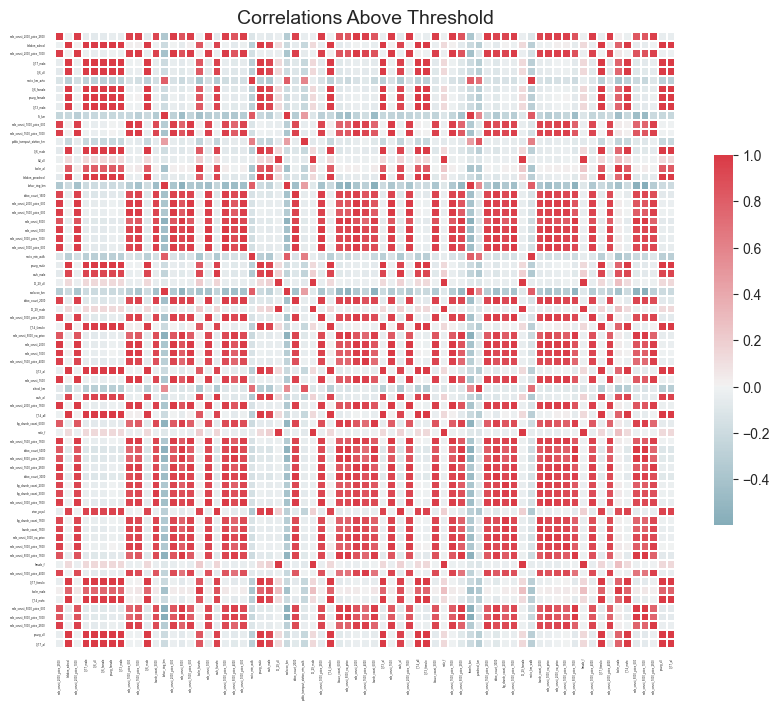

In [80]:
# для визуализации можно построить тепловую карту
fs.plot_collinear()

Эта штука ниже убирает ненужные фичи с нулевым влиянием. Но из-за того что в классе используется доисторические версии библиотек, она не работает.

In [81]:
# fs.identify_zero_importance(task = 'classification',
#                             eval_metric = 'l2',
#                             n_iterations = 10,
#                              early_stopping = True)

In [82]:
# удаляем отобраные признаки
train_removed = fs.remove(methods = ["collinear"])

Removed 71 features.


In [83]:
# количество признаков уменьшилось на 71
train_removed

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,northern,western,zelenograd,southwestern,novomoskovskiy,troitskiy,good,excellent,poor,satisfactory
8056,11,11.0,2.0,5.0,2.0,1907.0,1.0,12.0,3.0,1.007156e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8135,53,30.0,10.0,16.0,1.0,1980.0,2.0,8.0,3.0,5.646405e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8153,77,41.0,2.0,17.0,6.0,2014.0,3.0,12.0,1.0,2.149409e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8154,45,27.0,6.0,9.0,1.0,1970.0,2.0,6.0,3.0,8.889467e+06,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8186,63,63.0,17.0,17.0,4.0,2013.0,2.0,1.0,1.0,1.139168e+07,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,56,51.0,19.0,19.0,1.0,2017.0,2.0,1.0,1.0,4.441296e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30466,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,3.0,1.005305e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30467,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,3.0,7.307411e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30469,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,2.0,6.050065e+06,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [84]:
train_removed.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,northern,western,zelenograd,southwestern,novomoskovskiy,troitskiy,good,excellent,poor,satisfactory
count,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,1.526600e+04,15266.000000,15266.000000,15266.000000,1.526600e+04,...,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000
mean,53.491091,35.154133,7.160291,12.403380,1.925193,3.205912e+03,1.941832,7.486964,2.218787,1.437054e+07,...,0.124132,0.127866,0.096554,0.013494,0.076772,0.034128,0.149089,0.238962,0.322481,0.289467
std,21.597899,63.647541,5.116621,6.194088,1.523881,1.622765e+05,0.871064,28.780505,0.846381,1.738005e+07,...,0.329743,0.333951,0.295360,0.115381,0.266238,0.181564,0.356188,0.426464,0.467441,0.453530
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,1.000000,2.081628e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1.967000e+03,1.000000,5.000000,2.000000,6.377883e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,48.000000,30.000000,6.000000,12.000000,1.000000,1.979000e+03,2.000000,7.000000,2.000000,9.282439e+06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,43.000000,10.000000,17.000000,2.000000,2.005000e+03,3.000000,9.000000,3.000000,1.488362e+07,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,637.000000,7478.000000,77.000000,57.000000,6.000000,2.005201e+07,19.000000,2014.000000,33.000000,2.060718e+08,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Выявление и обработка выбросов

https://www.dmitrymakarov.ru/data-analysis/outliers-09/

Тут я продолжаю работать с изменёной датой, 3 удаленные колонки уже были обработаны выше при помощи onehot_encode

### Делал я всё по этой статье https://design-hero.ru/articles/177950/:
#### Замена резко отклоняющихся значений подходящим значением

##### Использование IQR

In [85]:
df_train_replace = train_removed.copy()

# заменяем во всех колонках выбросы и вычисляем нижний и верхний предел,
# а затем просто отбрасываем все значения, которые меньше или выше предела,
# и заменяем их соответственно нижним и верхним пределом.
col = df_train_replace.columns
for el in col:
  Q1 = df_train_replace[el].quantile(0.25)
  Q3 = df_train_replace[el].quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  df_train_replace[el] = np.where(df_train_replace[el]>upper_limit,upper_limit,df_train_replace[el])
  df_train_replace[el] = np.where(df_train_replace[el]<lower_limit,lower_limit,df_train_replace[el])

In [86]:
df_train_replace.describe()

,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,area_m,...,northern,western,zelenograd,southwestern,novomoskovskiy,troitskiy,good,excellent,poor,satisfactory
count,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,15266.000000,1.526600e+04,...,15266.0,15266.0,15266.0,15266.0,15266.0,15266.0,15266.0,15266.0,15266.000000,15266.000000
mean,52.720916,33.875540,7.096391,12.356216,1.659407,1981.788353,1.939080,6.861260,2.216920,1.162027e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322481,0.289467
std,18.190834,16.418563,4.886178,6.018973,0.976462,25.813559,0.844913,3.351219,0.809092,7.166374e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.467441,0.453530
min,0.500000,0.000000,0.000000,0.000000,1.000000,1910.000000,0.000000,0.000000,1.000000,2.081628e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
25%,38.000000,20.000000,3.000000,9.000000,1.000000,1967.000000,1.000000,5.000000,2.000000,6.377883e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
50%,48.000000,30.000000,6.000000,12.000000,1.000000,1979.000000,2.000000,7.000000,2.000000,9.282439e+06,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
75%,63.000000,43.000000,10.000000,17.000000,2.000000,2005.000000,3.000000,9.000000,3.000000,1.488362e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000
max,100.500000,77.500000,20.500000,29.000000,3.500000,2062.000000,6.000000,15.000000,4.500000,2.764223e+07,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000


# **Линейная регрессия**

In [87]:
from sklearn.model_selection import train_test_split

X = df_train_replace.drop(['price_doc'], axis=1)
y = df_train_replace['price_doc']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [92]:
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, root_mean_squared_error

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
print("Для обучающей выборки:")
print(f'R2 Score: {r2_score(y_train, train_pred)}')
print(f'MSE: {mean_squared_error(y_train, train_pred)}')
print(f'RMSE: {root_mean_squared_error(y_train, train_pred)}')

test_pred = model.predict(X_test)
print("\nДля тестовой выборки:")
print(f'R2 Score: {r2_score(y_test, test_pred)}')
print(f'MSE: {mean_squared_error(y_test, test_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, test_pred)}')

Для обучающей выборки:
R2 Score: 0.5547293472838719
MSE: 5381113155831.56
RMSE: 2319722.6463160547

Для тестовой выборки:
R2 Score: 0.5223784692247306
MSE: 5994741481891.282
RMSE: 2448416.1169807883


# **Метод случайного леса**

In [93]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parametrs = {
    'max_depth': [10],
    'min_samples_leaf': [1],
    'min_samples_split': [2],
    'n_estimators': [100]
}

clf = RandomForestRegressor()

grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(X_train, y_train)

train_pred = grid.predict(X_train)
print("Для обучающей выборки:")
print(f'R2 Score: {r2_score(y_train, train_pred)}')
print(f'MSE: {mean_squared_error(y_train, train_pred)}')
print(f'RMSE: {root_mean_squared_error(y_train, train_pred)}')

test_pred = grid.predict(X_test)
print("\nДля тестовой выборки:")
print(f'R2 Score: {r2_score(y_test, test_pred)}')
print(f'MSE: {mean_squared_error(y_test, test_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, test_pred)}')

Для обучающей выборки:
R2 Score: 0.7615147408992546
MSE: 2882103631557.0234
RMSE: 1697675.950102676
Для тестовой выборки:
R2 Score: 0.5509055040108619
MSE: 5636691880337.115
RMSE: 2374171.830415211


# **Метод случайного леса**

In [94]:
from sklearn import linear_model

model_Lasso = linear_model.Lasso(alpha=0.1)
model_Lasso.fit(X_train, y_train)

train_pred = model_Lasso.predict(X_train)
print("Для обучающей выборки:")
print(f'R2 Score: {r2_score(y_train, train_pred)}')
print(f'MSE: {mean_squared_error(y_train, train_pred)}')
print(f'RMSE: {root_mean_squared_error(y_train, train_pred)}')

test_pred = model_Lasso.predict(X_test)
print("Для тестовой выборки:")
print(f'R2 Score: {r2_score(y_test, test_pred)}')
print(f'MSE: {mean_squared_error(y_test, test_pred)}')
print(f'RMSE: {root_mean_squared_error(y_test, test_pred)}')

Для обучающей выборки:
R2 Score: 0.5547293464119055
MSE: 5381113166369.307
RMSE: 2319722.648587392
Для тестовой выборки:
R2 Score: 0.5223787097855723
MSE: 5994738462554.917
RMSE: 2448415.5003910013


C:\Projects\Python\SiriusAI\venv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.286e+16, tolerance: 1.476e+13
  model = cd_fast.enet_coordinate_descent(
